## 1. Coleta e Preparação de Dados

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
# Carregar os dados
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]  # Adicionar nomes de colunas


In [9]:
# Carregar o dataset e nomear as colunas
data = pd.read_csv(url, header=None, names=column_names)

# Verificar os primeiros registros
print(data.head())

         ID Diagnosis  feature_1  feature_2  feature_3  feature_4  feature_5  \
0    842302         M      17.99      10.38     122.80     1001.0    0.11840   
1    842517         M      20.57      17.77     132.90     1326.0    0.08474   
2  84300903         M      19.69      21.25     130.00     1203.0    0.10960   
3  84348301         M      11.42      20.38      77.58      386.1    0.14250   
4  84358402         M      20.29      14.34     135.10     1297.0    0.10030   

   feature_6  feature_7  feature_8  ...  feature_21  feature_22  feature_23  \
0    0.27760     0.3001    0.14710  ...       25.38       17.33      184.60   
1    0.07864     0.0869    0.07017  ...       24.99       23.41      158.80   
2    0.15990     0.1974    0.12790  ...       23.57       25.53      152.50   
3    0.28390     0.2414    0.10520  ...       14.91       26.50       98.87   
4    0.13280     0.1980    0.10430  ...       22.54       16.67      152.20   

   feature_24  feature_25  feature_26  featu

In [10]:
# Remover a coluna de ID, pois não é necessária
data = data.drop(columns=['ID'])

In [11]:
# Separar a variável target (Diagnosis) e os dados de entrada
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

In [12]:
# Normalizar os dados (Padronização)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 2. Aplicação do K-Means

Agora que os dados estão preparados, aplicaremos o algoritmo K-Means para encontrar padrões nos dados.

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [14]:
# Testando diferentes valores de K (número de clusters)
k_values = range(2, 10)
silhouette_scores = []


In [15]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"Para K = {k}, Silhouette Score: {score}")

Para K = 2, Silhouette Score: 0.3447344346611054
Para K = 3, Silhouette Score: 0.3151862330494096
Para K = 4, Silhouette Score: 0.27415774203442206
Para K = 5, Silhouette Score: 0.16454819399495382
Para K = 6, Silhouette Score: 0.1450578794997139
Para K = 7, Silhouette Score: 0.1469508140067517
Para K = 8, Silhouette Score: 0.16185657051384186
Para K = 9, Silhouette Score: 0.1439495585582379


In [16]:
# Escolhendo o melhor K baseado no Silhouette Score
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Melhor número de clusters: {best_k}")

Melhor número de clusters: 2


## 3. Análise dos Clusters

Após a criação dos clusters, podemos tentar associá-los com as classes "benigno" e "maligno" (da variável Diagnosis) para ver se há uma correspondência significativa.

In [17]:
# Aplicando K-Means com o melhor K
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [18]:
# Adicionando os clusters aos dados originais
data['Cluster'] = clusters

# Comparando clusters com a variável Diagnosis
comparison = pd.crosstab(data['Diagnosis'], data['Cluster'])
print(comparison)

Cluster      0    1
Diagnosis          
B           13  344
M          175   37


## 4. Visualização dos Resultados

Usaremos PCA para reduzir a dimensionalidade dos dados e visualizar os clusters.

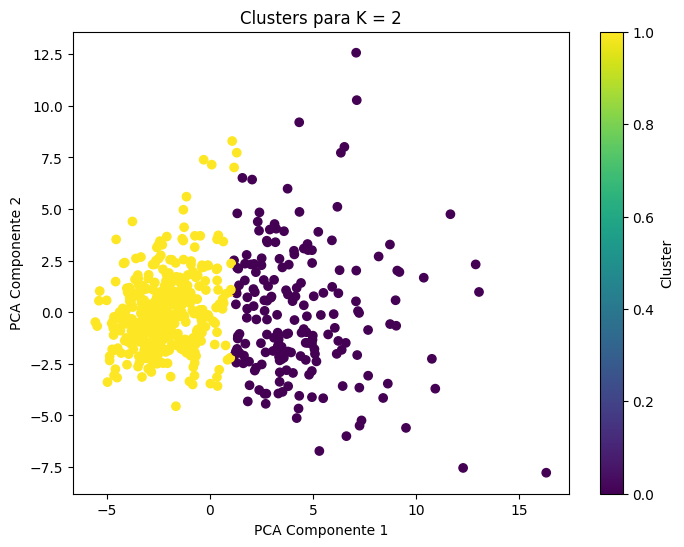

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduzindo a dimensionalidade para 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotando os clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title(f'Clusters para K = {best_k}')
plt.xlabel('PCA Componente 1')
plt.ylabel('PCA Componente 2')
plt.colorbar(label='Cluster')
plt.show()

Após rodar este pipeline, a análise dos clusters ajudará a observar como as características celulares dos tumores se agrupam e se há correspondência com a malignidade. O Silhouette Score ajudará a identificar o melhor número de clusters. Este processo pode ser valioso para entender padrões celulares em tumores e auxiliar na estratificação dos pacientes com base no risco de malignidade.

Você pode expandir a análise incluindo validação cruzada, mais métricas para avaliar a qualidade dos agrupamentos, ou aplicar outros métodos como DBSCAN para comparação.